<img src="../images/magic8ball.jpeg"  style="float: left; margin: 20px; height: 100px">

# Magic 8 balls

# Afolabi Notebook

#### Library imports

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### API requests for all 50 states

In [432]:
# #create empty dataframe 
# df = pd.DataFrame(columns = ['submission_date','state','tot_cases'])

#list of 51 US states 
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [433]:
## total cases for all states from 2020-01-23 to 2021-12-29	
# for state in states:
#     url = 'https://data.cdc.gov/resource/9mfq-cb36.json?$select=submission_date,state,tot_cases&$where=submission_date%3E=%222020-01-23%22AND%20submission_date%3C%222021-12-30%22AND%20state=%27' + state + '%27&$limit=105000&$offset=0'
#     res = requests.get(url)
#     data = res.json()
    
#     #convert to dataframe
#     data = pd.DataFrame(data)
    
#     #concat new dataframe with empty dataframe initialized above
#     df = pd.concat([df,data])
    
#     #so not to get ban from the internet
#     time.sleep(3)

In [434]:
# df.head()

#### Export dataframe for all the states

In [435]:
# df.to_csv('../data/afolabi/all_states_raw.csv', index=False)

#### Re-import the csv

In [436]:
df = pd.read_csv('../data/afolabi/all_states_raw.csv')
df.head()

,submission_date,state,tot_cases
0,2020-06-28T00:00:00.000,AK,887
1,2021-02-25T00:00:00.000,AK,55950
2,2021-12-05T00:00:00.000,AK,146558
3,2020-05-07T00:00:00.000,AK,374
4,2021-11-05T00:00:00.000,AK,136822


#### Check for nulls

In [437]:
df.isnull().sum()

submission_date    0
state              0
tot_cases          0
dtype: int64

The total cases column is in type object, i'll convert it to integer

In [438]:
df['tot_cases'] = df['tot_cases'].map(int)

In [439]:
df.head()

,submission_date,state,tot_cases
0,2020-06-28T00:00:00.000,AK,887
1,2021-02-25T00:00:00.000,AK,55950
2,2021-12-05T00:00:00.000,AK,146558
3,2020-05-07T00:00:00.000,AK,374
4,2021-11-05T00:00:00.000,AK,136822


In [440]:
df.sort_index()

,submission_date,state,tot_cases
0,2020-06-28T00:00:00.000,AK,887
1,2021-02-25T00:00:00.000,AK,55950
2,2021-12-05T00:00:00.000,AK,146558
3,2020-05-07T00:00:00.000,AK,374
4,2021-11-05T00:00:00.000,AK,136822
...,...,...,...
36052,2020-07-06T00:00:00.000,WY,1675
36053,2020-05-30T00:00:00.000,WY,898
36054,2020-12-02T00:00:00.000,WY,34507
36055,2021-05-15T00:00:00.000,WY,59126


Convert the submission date to datetime object and set as index

In [441]:
df['submission_date'] = pd.to_datetime(df['submission_date'])

In [442]:
df.head(2)

,submission_date,state,tot_cases
0,2020-06-28,AK,887
1,2021-02-25,AK,55950


In [443]:
#set as index
df.set_index('submission_date', inplace=True)
df.head(2)

,state,tot_cases
submission_date,,
2020-06-28,AK,887
2021-02-25,AK,55950


In [444]:
df[df['state']=='AK'].sort_index()

,state,tot_cases
submission_date,,
2020-01-23,AK,0
2020-01-24,AK,0
2020-01-25,AK,0
2020-01-26,AK,0
2020-01-27,AK,0
...,...,...
2021-12-25,AK,149815
2021-12-26,AK,149815
2021-12-27,AK,150643


In [445]:
        
df_new = pd.DataFrame()
df_lst = []

for state in states:
    #create a dataframe for state
    state_df = df[df['state']== state]
    
    #sort the date index
    state_df.sort_index(inplace=True)
    
    #use diff to get remove people recovered after 14 days (assumming recovery rate is 14days)
    state_df['I_actual'] = state_df['tot_cases'].diff(14)
    state_df['I_actual'][:14] = state_df['tot_cases'][0:14]
    
    #append the created dataframe to a new list initialized above
    df_new = pd.concat([df_new,state_df])
    


/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_50532/2019756507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df.sort_index(inplace=True)
/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_50532/2019756507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['I_actual'] = state_df['tot_cases'].diff(14)
/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_50532/2019756507.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [446]:
df_new

,state,tot_cases,I_actual
submission_date,,,
2020-01-23,AK,0,0.0
2020-01-24,AK,0,0.0
2020-01-25,AK,0,0.0
2020-01-26,AK,0,0.0
2020-01-27,AK,0,0.0
...,...,...,...
2021-12-25,WY,114242,1380.0
2021-12-26,WY,114242,1380.0
2021-12-27,WY,114624,1547.0


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36057 entries, 2020-06-28 to 2020-11-05
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      36057 non-null  object
 1   tot_cases  36057 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 845.1+ KB


In [448]:
df_new.to_csv('../data/afolabi/all_cases_infected.csv')

In [449]:
df_test = pd.read_csv('../data/afolabi/all_cases_infected.csv')
df_test

,submission_date,state,tot_cases,I_actual
0,2020-01-23,AK,0,0.0
1,2020-01-24,AK,0,0.0
2,2020-01-25,AK,0,0.0
3,2020-01-26,AK,0,0.0
4,2020-01-27,AK,0,0.0
...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0
36053,2021-12-26,WY,114242,1380.0
36054,2021-12-27,WY,114624,1547.0
36055,2021-12-28,WY,114917,1684.0


#### Import population csv

In [450]:
population = pd.read_csv('../data/afolabi/population_usa_2019.csv')
population.head()

,name,state,population 2019
0,Alaska,AK,731545
1,Alabama,AL,4903185
2,Arkansas,AR,3017804
3,Arizona,AZ,7278717
4,California,CA,39512223


In [451]:
#check if the states lists tallies with the population data
list(population['state']) == states

True

In [452]:
df_thomas = pd.read_csv('../data/thomas/df_tableau.csv', index_col='state')
df_thomas[['I','I_SIR','I_Arima']]

,I,I_SIR,I_Arima
state,,,
AK,8890.0,8890.000000,8890.000000
AK,8811.0,9944.100000,8811.000000
AK,8544.0,9852.341759,8544.000000
AK,8460.0,9550.575209,8460.000000
AK,8042.0,9453.662093,8042.000000
...,...,...,...
WY,1380.0,1504.538457,1417.924340
WY,1380.0,1504.764058,1298.646301
WY,1547.0,1505.172937,1284.478721


In [453]:
states_new = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [454]:
mae = pd.DataFrame(columns=['state', 'SIR RMSE', 'ARIMA RMSE'])

In [455]:
mean_absolute_error(df_thomas.loc['AK', 'I'], df_thomas.loc['AK', 'I_SIR'])

391.2449462509368

In [456]:
mae_sir_lst = []
mae_arima_lst = []
for state in states_new:
    state_I = df_thomas.loc[state , 'I']
    state_SIR = df_thomas.loc[state, 'I_SIR']
    state_ARIMA = df_thomas.loc[state, 'I_Arima']
    
    mae_sir = mean_absolute_error(state_I, state_SIR)
    mae_arima = mean_absolute_error(state_I, state_ARIMA)
    
    mae_sir_lst.append(mae_sir**0.5)
    mae_arima_lst.append(mae_arima**0.5)

In [457]:
mae['state'] = state_new
mae['SIR RMSE'] = mae_sir_lst
mae['ARIMA RMSE'] = mae_arima_lst

In [458]:
mae.to_csv('../data/afolabi/mae.csv')

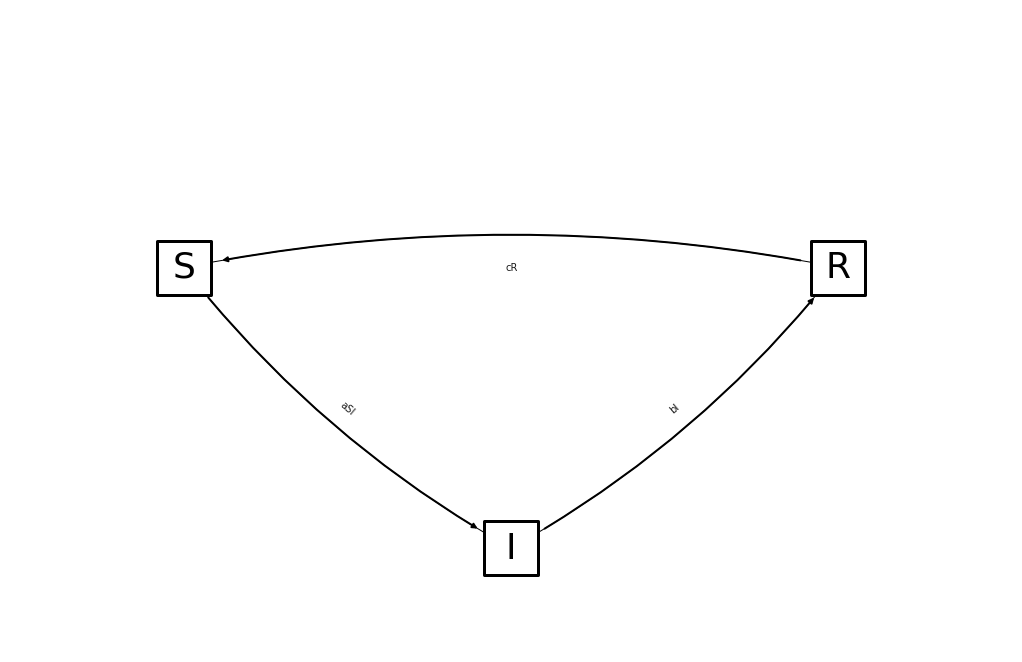

In [285]:
# this cell is just to generate the visual below it.
import matplotlib.pyplot as plt
import networkx as nx # to draw graphs, including directed graphs

edges = [('S','I',{'label':'aSI'}),
         ('I','R',{'label':'bI'}), 
         ('R','S',{'label':'cR'}), 
#          ('S','R',{'label':'\n\n\n\n\n\n\u03B1S'})
        ] # the \n's are a hack to separate labels
G = nx.DiGraph(edges)

# explicitly set positions
pos = {'S': (0, 0), 'I': (1, -.5), 'R': (2, 0)}

options = {
    'arrows':True,
    "font_size": 36,
    "node_size": 3000,
    'node_shape':'s',
#     'alpha' : 0.5,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 2,
}
nx.draw(G, pos, **options,
        labels={node: node for node in G.nodes()},
        connectionstyle="arc3,rad=0.1",
       )

edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels = edge_labels,
                             alpha=0.9 # does not expose arrows
#                              connectionstyle="arc3,rad=0.1" #doesn't work to expose arrows
                            )
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
#                        label='lkajsdfkasdlfkjasdlfkj', # doesn't label edges, for legend
                      connectionstyle="arc3,rad=0.1" )

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off");

# SIR Modeling


#### Simulation

In [326]:
import numpy as np
import pandas as pd

def SIR_sim(S0=.9,
            I0=.1,
            d = 100, 
            p = 1, 
            a = 10**(-3),
            b = 10**(-1), 
            c = 0,
            alpha = 0, 
            dt=1):
    """Takes initial populations and predicts populations at all later times.
    The function is defined with default values to enable group member to play with it."""
    # Initialize S,I,R
    S = pd.Series(data = np.zeros(d,))
    I = pd.Series(data = np.zeros(d,))
    R = pd.Series(data = np.zeros(d,))
    S[0] = S0
    I[0] = I0
    R[0] = p-S0-I0

    # calculate later values from initial values
    for t in range(0,d):
        dS = -a*S[t]*I[t]           * dt #ds/dt = -aSI 
        dI = (a*S[t]*I[t] - b*I[t]) * dt # dI/dt = aSI-bI
        dR = b*I[t]                 * dt 
        S[t+1] = S[t]+dS
        I[t+1] = I[t]+dI
        R[t+1] = R[t]+dR

    # collect into a data frame
    columns_SIR = ['day','S','I','R']
    eg = pd.DataFrame(columns = columns_SIR)
    eg['day'] = range(d+1)
    eg['S'] = S
    eg['I'] = I
    eg['R'] = R
    return eg



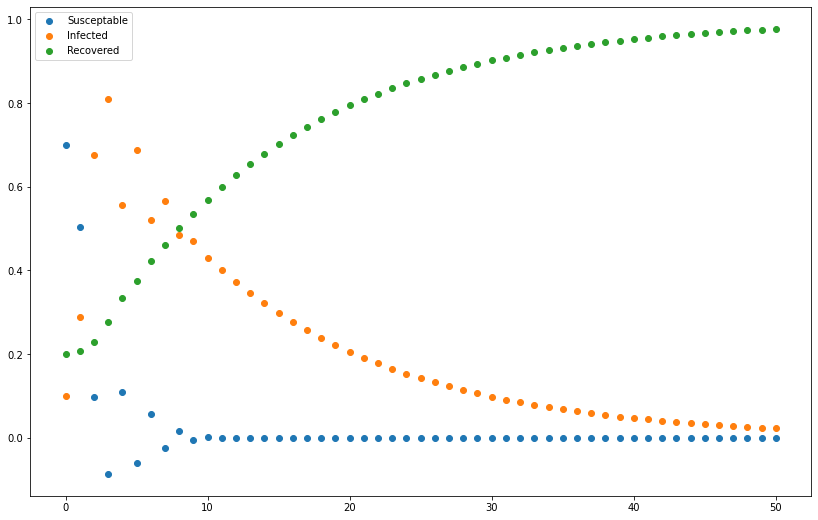

In [327]:
# run sim with custom values
p = 1
b = 1/14
# a = 0.001*(2.8+b)/p
a = 2.8/p

eg = SIR_sim(d=50,
             S0=.7,
             I0=.1,
             a=a,
             b=b
            )

import matplotlib.pyplot as plt
plt.scatter(eg['day'], eg['S'],label='Susceptable')
plt.scatter(eg['day'], eg['I'], label='Infected')
plt.scatter(eg['day'], eg['R'], label ='Recovered')
plt.legend();


# Now with real data


Time series should have date as index. 

Create a copy of the Maryland data

In [516]:
df

,state,tot_cases
submission_date,,
2020-01-22,NH,0
2020-01-22,NV,0
2020-01-22,MT,0
2020-01-22,ME,0
2020-01-22,MN,0
...,...,...
2021-12-29,AK,151583
2021-12-29,DE,174909
2021-12-29,KS,519544


In [328]:
df = df_cases.copy()

In [329]:
df.head()

,state,tot_cases
submission_date,,
2020-03-20,MD,149
2020-06-07,MD,57973
2020-08-10,MD,96258
2020-02-26,MD,0
2020-11-04,MD,148766


Sort date index in right order

In [345]:
df.sort_index(inplace=True)

#### Let's data from the first reported case

First case was seen on 2020-03-05, I will start analysis from this date

In [356]:
df[df['tot_cases']>0]

,state,tot_cases,infected
submission_date,,,
2020-03-05,MD,3,NaN
2020-03-06,MD,3,NaN
2020-03-07,MD,3,NaN
2020-03-08,MD,5,NaN
2020-03-09,MD,6,NaN
...,...,...,...
2021-12-25,MD,661141,59568.0
2021-12-26,MD,667341,64407.0
2021-12-27,MD,673128,68743.0


In [357]:
df = df.loc['2020-03-05':]

#### Create a column for the total number of people infected with covid that day

In [374]:
df['infected'] = df['tot_cases'].diff(14)
df['infected'][:14] = df['tot_cases'][0:14]

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_7829/3994550555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['infected'][:14] = df['tot_cases'][0:14]


In [375]:
df.head(16)

,state,tot_cases,infected
submission_date,,,
2020-03-05,MD,3,3.0
2020-03-06,MD,3,3.0
2020-03-07,MD,3,3.0
2020-03-08,MD,5,5.0
2020-03-09,MD,6,6.0
2020-03-10,MD,9,9.0
2020-03-11,MD,12,12.0
2020-03-12,MD,12,12.0
2020-03-13,MD,15,15.0


Run the SIR model with Maryland numbers

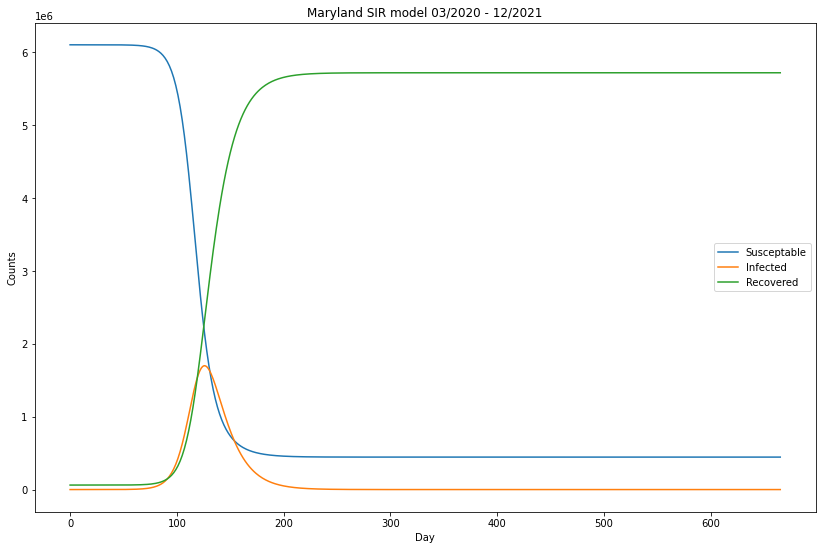

In [376]:
# run sim with MD values 
p = 6_165_129 # population of the state of Maryland from census bureau
I0 = df['infected'][0]
S0 = 0.99*(p-I0) # Assumption that R0 = 0
d= len(df) #number of days is length of list
b = 1/14

#run SIR function
eg = SIR_sim(d = len(df),
             p = p,
             I0 = I0,
             S0 = S0 , #0.9*(p-I0) assumes 10% of the uninfected pop is recovered initially
             a = (2.8*b)/p,  
             b = b 
            )


plt.plot(eg['day'], eg['S'],label='Susceptable')
plt.plot(eg['day'], eg['I'], label='Infected')
plt.plot(eg['day'], eg['R'], label ='Recovered')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.title('Maryland SIR model 03/2020 - 12/2021')
plt.legend();


## EDA

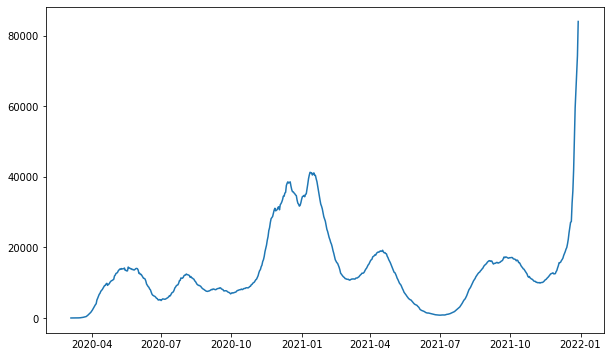

In [379]:
plt.figure(figsize=(10,6))

plt.tight_layout()
#plt.plot(df['tot_cases'])
plt.plot(df['infected']);

In [244]:
from statsmodels.tsa.seasonal import seasonal_decompose

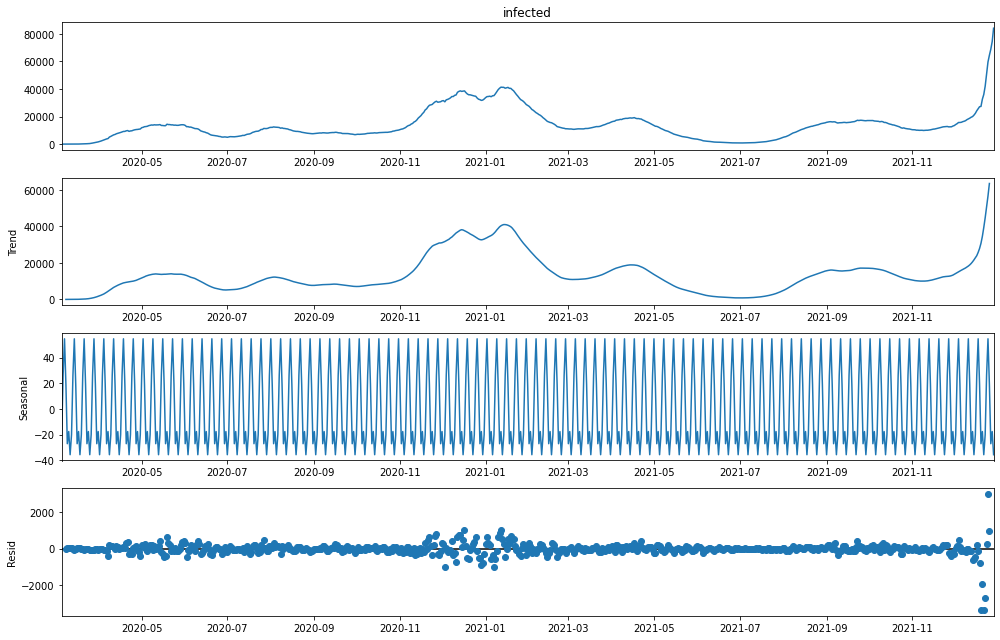

In [380]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df['infected'].dropna())
plt.rcParams['figure.figsize'] = (14, 9)

# Plot the decomposed time series.
decomp.plot();

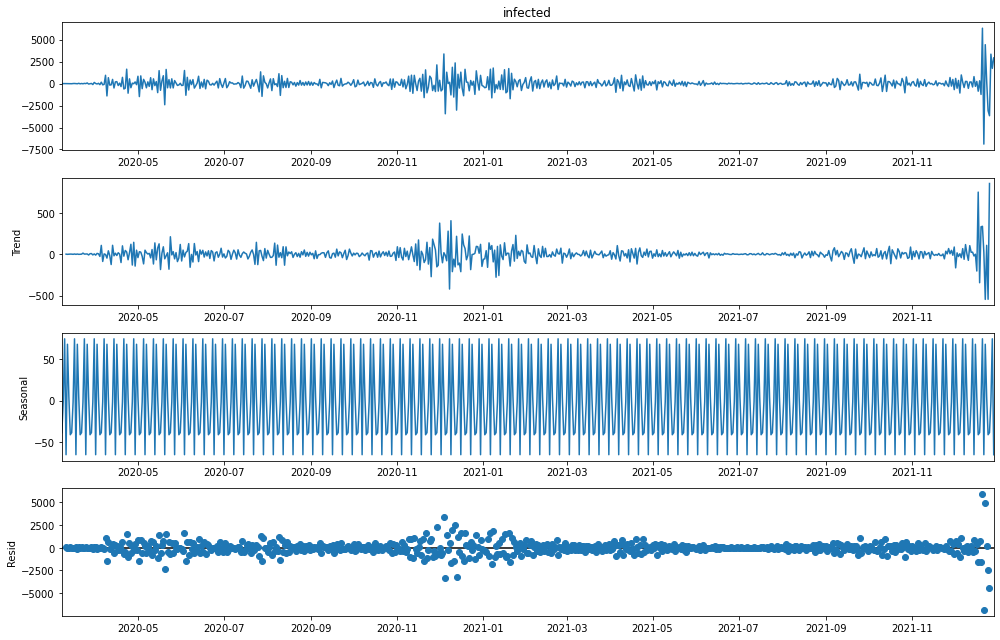

In [381]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df['infected'].diff().diff().diff().dropna())
plt.rcParams['figure.figsize'] = (14, 9)

# Plot the decomposed time series.
decomp.plot();

In [220]:
from statsmodels.tsa.stattools import adfuller

In [239]:
# Code written by Joseph Nelson.
# Improved by Hovanes Gasparian

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [384]:
# Run ADF test on the original Real GDP data.
tiffyDIFF = df['infected'].diff().diff().diff().dropna()
interpret_dftest(adfuller(tiffyDIFF))


Test Statistic   -7.647681e+00
p-value           1.824177e-11
Lag Used          2.000000e+01
dtype: float64

## ARIMA

In [393]:
# Import ARIMA model.
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [394]:
y_train, y_test = train_test_split(df['infected'], test_size=.1, shuffle=False)

In [395]:
# Starting AIC, p, and q.
best_aic = 999999
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 3, q) model.
            print(f'Attempting ARIMA({p}, 3, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog=y_train, order=(p, 3, q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 3, q) model.
            print(f'The AIC for ARIMA({p},3,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},3,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 3, 0)
The AIC for ARIMA(0,3,0) is: 9261.84097100319
Attempting ARIMA(0, 3, 1)
The AIC for ARIMA(0,3,1) is: 8628.49430329495
Attempting ARIMA(0, 3, 2)
The AIC for ARIMA(0,3,2) is: 8447.682931241041
Attempting ARIMA(0, 3, 3)
The AIC for ARIMA(0,3,3) is: 8449.649261514693
Attempting ARIMA(0, 3, 4)
The AIC for ARIMA(0,3,4) is: 8447.295803445779
Attempting ARIMA(1, 3, 0)
The AIC for ARIMA(1,3,0) is: 8878.24081593554
Attempting ARIMA(1, 3, 1)
The AIC for ARIMA(1,3,1) is: 8483.345530658906
Attempting ARIMA(1, 3, 2)
The AIC for ARIMA(1,3,2) is: 8449.637814121543
Attempting ARIMA(1, 3, 3)
The AIC for ARIMA(1,3,3) is: 8436.570408523434
Attempting ARIMA(1, 3, 4)
The AIC for ARIMA(1,3,4) is: 8437.954074672529
Attempting ARIMA(2, 3, 0)
The AIC for ARIMA(2,3,0) is: 8760.472164441268
Attempting ARIMA(2, 3, 1)
The AIC for ARIMA(2,3,1) is: 8469.281247988942
Attempting ARIMA(2, 3, 2)
The AIC for ARIMA(2,3,2) is: 8462.770891607854
Attempting ARIMA(2, 3, 3)
The AIC for ARIMA(2,3,3) is:

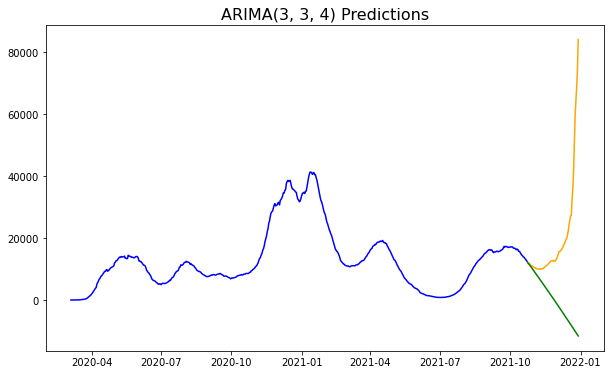

In [396]:
# Instantiate best model.
arima = ARIMA(endog=y_train, order=(3,3,4))


# Fit ARIMA model.
model = arima.fit()

# Generate predictions based on test set.
preds = model.predict(start=y_test.index[0], end = y_test.index[-1])
preds
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, y_train, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test, color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'ARIMA(3, 3, 4) Predictions', fontsize=16)
plt.show();

#### Export data

In [317]:
eg.to_csv('../data/afolabi.csv', index=False)